In [5]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [6]:
#########################################################################
########################################################################
#######################################################################
######################################################################
#####################################################################
####################################################################

# Sisfall dataset

### Visualization

In [7]:
data = pd.read_csv('../input/sisfall-dataset-with-lableadl-or-fall/SisFall_dataset.csv')
data['Situation'] = 1*(data['Situation'] == 'Fall')
data = data.to_numpy()

xtrain = data[:,0:data.shape[1]-1].astype(float)
ytrain = data[:,data.shape[1]-1].astype(float)

xtrain,xtest,ytrain,ytest = train_test_split(xtrain,ytrain,train_size = 0.8)

In [8]:
## Feature scaling (since accuracy do not go above 90%)
min_ = []
max_ = []

for i in range(9):
    min_.append(min(xtrain[:,i]))
    max_.append(max(xtrain[:,i]))
    
    xtrain[:,i] = 2*(xtrain[:,i]-min_[i])/(max_[i]-min_[i])-1
    xtest[:,i] = 2*(xtest[:,i]-min_[i])/(max_[i]-min_[i])-1

In [9]:
xtrain.shape,ytrain.shape,xtest.shape,ytest.shape

((1677720, 9), (1677720,), (419430, 9), (419430,))

In [10]:
def build_network(input_shape):
    
    input_layer = keras.Input(shape = input_shape,name = 'title_')
    
    act = layers.ReLU()
    
    cnn = layers.Dense(9,activation = act,name = 'dense_1')(input_layer)
    cnn = layers.Dense(81,activation = act,name = 'dense_2')(cnn)
    cnn = layers.BatchNormalization()(cnn)
    
    cnn = layers.Dense(729,activation = act,name = 'dense_3')(cnn)    
    cnn = layers.Dense(729,activation = act,name = 'dense_6')(cnn)
    cnn = layers.BatchNormalization()(cnn)
    
    cnn = layers.Dense(81,activation = act,name = 'dense_7')(cnn)
    cnn = layers.Dense(9,activation = act,name = 'dense_8')(cnn)
    cnn = layers.Dense(1,activation='sigmoid',name = 'dense_9')(cnn)
    
    return keras.Model(input_layer,cnn,name = 'model')

In [11]:
cnn = build_network(xtrain.shape[1:])

2022-10-14 07:13:44.387395: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [12]:
cnn.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
title_ (InputLayer)          [(None, 9)]               0         
_________________________________________________________________
dense_1 (Dense)              (None, 9)                 90        
_________________________________________________________________
dense_2 (Dense)              (None, 81)                810       
_________________________________________________________________
batch_normalization (BatchNo (None, 81)                324       
_________________________________________________________________
dense_3 (Dense)              (None, 729)               59778     
_________________________________________________________________
dense_6 (Dense)              (None, 729)               532170    
_________________________________________________________________
batch_normalization_1 (Batch (None, 729)               2916  

In [13]:
# Training cnn
cnn.compile(loss = 'binary_crossentropy',optimizer='Adam',metrics=['accuracy'])
cnn_history = cnn.fit(
    xtrain,
    ytrain,
    epochs = 15,
    validation_data = (
        xtest,
        ytest
    ),
    batch_size = 200
)

2022-10-14 07:13:44.708654: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/15
8389/8389 [==============================] - 131s 15ms/step - loss: 0.3567 - accuracy: 0.8251 - val_loss: 0.5674 - val_accuracy: 0.7547
Epoch 2/15
8389/8389 [==============================] - 129s 15ms/step - loss: 0.2786 - accuracy: 0.8682 - val_loss: 1.3822 - val_accuracy: 0.6929
Epoch 3/15
8389/8389 [==============================] - 129s 15ms/step - loss: 0.2471 - accuracy: 0.8835 - val_loss: 0.3369 - val_accuracy: 0.8253
Epoch 4/15
8389/8389 [==============================] - 133s 16ms/step - loss: 0.2360 - accuracy: 0.8894 - val_loss: 0.3454 - val_accuracy: 0.8388
Epoch 5/15
8389/8389 [==============================] - 131s 16ms/step - loss: 0.2281 - accuracy: 0.8936 - val_loss: 0.5827 - val_accuracy: 0.7792
Epoch 6/15
8389/8389 [==============================] - 132s 16ms/step - loss: 0.2202 - accuracy: 0.8979 - val_loss: 0.4177 - val_accuracy: 0.8232
Epoch 7/15
8389/8389 [==============================] - 132s 16ms/step - loss: 0.2138 - accuracy: 0.9015 - val_loss: 1

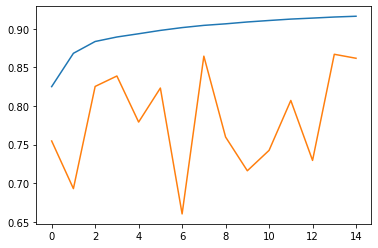

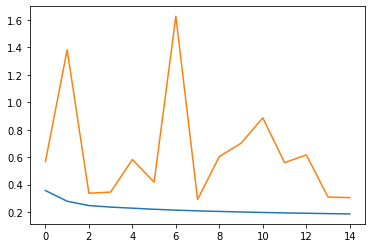

In [14]:
plt.plot(cnn_history.history['accuracy'])
plt.plot(cnn_history.history['val_accuracy'])
plt.show()
plt.plot(cnn_history.history['loss'])
plt.plot(cnn_history.history['val_loss'])
plt.show()